In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
# Load the Dataset
df = pd.read_csv("lung_cancer_dataset.csv")  # or your own path
df.columns = df.columns.str.strip()  # Clean column names
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [3]:
# Preprocessing
# Encode categorical columns
le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])  # M/F → 1/0
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])  # YES/NO → 1/0

# Check for missing values
print(df.isnull().sum())
df = df.dropna()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64


In [4]:
# Define Features and Target
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [6]:
# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.555

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.57      0.56       296
           1       0.56      0.54      0.55       304

    accuracy                           0.56       600
   macro avg       0.56      0.56      0.55       600
weighted avg       0.56      0.56      0.55       600



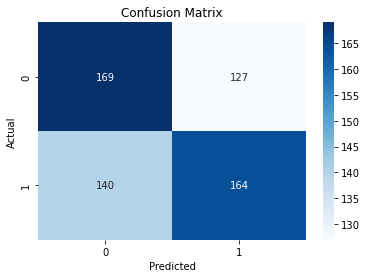

In [7]:
# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [8]:
# Save Trained Model
joblib.dump(model, 'lung_cancer_model.pkl')

['lung_cancer_model.pkl']